# Problem Statement

SwiftFreight is committed being the industry leader in logistic services through the continuous
investment in technology solutions and talented individuals. SwiftFreight is the middleman between the
customer and freight services. They will charge the customer and pay to the freight services and during
the transaction they will make their profit/revenue. The challenge is, given a request from a customer
for shipment they would like to decide the estimated cost for the carriers. This information will enable
them to quote the best price for the customer and reduce the revenue leakages and increase their bottom
line.


In [1]:
# from google.colab import drive
# drive.mount('/content/drive')
# import os
# path = '/content/drive/MyDrive/capstone'
# os.chdir(path)


# Importing required libraries


In [2]:
#importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV

# Data reading

In [3]:
data = pd.read_excel('Quickfreightdata.xlsx',na_values=[' ','np.nan',',','.','#']) #reading the dataframe
data.head() #get top five rows

,ORDER_NBR,EQUIPMENT_TYPE,CUSTOMER_MILES,WEIGHT,ORDER_COST,FIRST_PICK_ZIP,FIRST_PICK_EARLY_APPT,FIRST_PICK_LATE_APPT,LAST_DELIVERY_ZIP,LAST_DELIVERY_EARLY_APPT,LAST_DELIVERY_LATE_APPT,IS_HAZARDOUS,CREATED_DATE
0,535361133,53 FLATBED,802,42000,0.00,21224,2015-07-13 07:30:00,2015-07-13 15:00:00,62707,2015-07-14 08:00:00,2015-07-14 16:00:00,N,2015-07-01 10:22:00
1,1499443993,V,0,40500,875.00,L1W 3H9,2015-07-06 14:00:00,2015-07-06 14:00:00,13619,2015-07-07 07:00:00,2015-07-07 16:00:00,N,2015-07-02 10:37:00
2,1058279607,NaN,774,0,88.14,46037,2015-07-01 08:00:00,2015-07-02 17:00:00,73107,2015-07-07 08:00:00,2015-07-07 17:00:00,N,2015-07-01 15:05:00
3,2093496262,V,0,40500,875.00,L1W 3H9,2015-07-07 14:00:00,2015-07-07 14:00:00,13619,2015-07-08 07:00:00,2015-07-08 16:00:00,N,2015-07-02 10:38:00
4,2373724838,V,0,40500,875.00,L1W 3H9,2015-07-08 14:00:00,2015-07-08 14:00:00,13619,2015-07-09 07:00:00,2015-07-09 16:00:00,N,2015-07-02 11:16:00


In [4]:
#dimension of the dataframe
data.shape

(18739, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18739 entries, 0 to 18738
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ORDER_NBR                 18739 non-null  int64         
 1   EQUIPMENT_TYPE            17728 non-null  object        
 2   CUSTOMER_MILES            18739 non-null  int64         
 3   WEIGHT                    18739 non-null  int64         
 4   ORDER_COST                18733 non-null  float64       
 5   FIRST_PICK_ZIP            18739 non-null  object        
 6   FIRST_PICK_EARLY_APPT     18479 non-null  datetime64[ns]
 7   FIRST_PICK_LATE_APPT      18435 non-null  datetime64[ns]
 8   LAST_DELIVERY_ZIP         18739 non-null  object        
 9   LAST_DELIVERY_EARLY_APPT  18410 non-null  datetime64[ns]
 10  LAST_DELIVERY_LATE_APPT   18353 non-null  datetime64[ns]
 11  IS_HAZARDOUS              18739 non-null  object        
 12  CREATED_DATE      

## Descriptive Statistics

In [6]:
#descriptive statistics
data.describe()

,ORDER_NBR,CUSTOMER_MILES,WEIGHT,ORDER_COST
count,1.873900e+04,18739.000000,18739.000000,18733.000000
mean,1.417056e+09,588.220556,25219.585837,954.230941
std,6.642482e+08,511.968568,16309.867000,938.818390
min,5.322560e+05,0.000000,0.000000,0.000000
25%,8.640125e+08,254.000000,8000.000000,400.000000
50%,1.417617e+09,436.000000,28192.000000,700.000000
75%,1.973634e+09,716.000000,42000.000000,1300.000000
max,2.821138e+09,3733.000000,300000.000000,8000.000000


In [9]:
#get all columns names
data.columns

Index(['ORDER_NBR', 'EQUIPMENT_TYPE', 'CUSTOMER_MILES', 'WEIGHT', 'ORDER_COST',
       'FIRST_PICK_ZIP', 'FIRST_PICK_EARLY_APPT', 'FIRST_PICK_LATE_APPT',
       'LAST_DELIVERY_ZIP', 'LAST_DELIVERY_EARLY_APPT',
       'LAST_DELIVERY_LATE_APPT', 'IS_HAZARDOUS', 'CREATED_DATE'],
      dtype='object')

In [10]:
#getting unique values in all columns
data.nunique()

ORDER_NBR                   18739
EQUIPMENT_TYPE                 28
CUSTOMER_MILES               1411
WEIGHT                       2678
ORDER_COST                    758
FIRST_PICK_ZIP                842
FIRST_PICK_EARLY_APPT        3090
FIRST_PICK_LATE_APPT         3155
LAST_DELIVERY_ZIP            1843
LAST_DELIVERY_EARLY_APPT     3699
LAST_DELIVERY_LATE_APPT      3874
IS_HAZARDOUS                    2
CREATED_DATE                12181
dtype: int64

In [11]:
#knowing number of null values present in all columns
data.isnull().sum()

ORDER_NBR                      0
EQUIPMENT_TYPE              1011
CUSTOMER_MILES                 0
WEIGHT                         0
ORDER_COST                     6
FIRST_PICK_ZIP                 0
FIRST_PICK_EARLY_APPT        260
FIRST_PICK_LATE_APPT         304
LAST_DELIVERY_ZIP              0
LAST_DELIVERY_EARLY_APPT     329
LAST_DELIVERY_LATE_APPT      386
IS_HAZARDOUS                   0
CREATED_DATE                   0
dtype: int64

#### There is null values in target column named ORDER_COST.Removed the corresponding records wherever null values present in ORDER_COST column

In [12]:
data.drop(data[data[['ORDER_COST']].isnull().any(axis=1)].index,inplace=True) #dropping the null values present in ordercost

In [13]:
data.shape

(18733, 13)

In [14]:
data1 = data[data['ORDER_COST']!=0]

In [15]:
data1.shape

(15206, 13)

In [16]:
#getting all rwos containing null values present just to know
null_rows = data1[data1[['FIRST_PICK_EARLY_APPT','FIRST_PICK_LATE_APPT','LAST_DELIVERY_EARLY_APPT','LAST_DELIVERY_LATE_APPT']].isnull().any(axis=1)]

In [17]:
null_rows.shape

(154, 13)

In [18]:
#segregating all columns into different categories based on its nature
num_cols = ['CUSTOMER_MILES','WEIGHT']
cat_cols = ['EQUIPMENT_TYPE','IS_HAZARDOUS']
date_cols = ['FIRST_PICK_EARLY_APPT','FIRST_PICK_LATE_APPT','LAST_DELIVERY_EARLY_APPT','LAST_DELIVERY_LATE_APPT','CREATED_DATE']
target = ['ORDER_COST']
to_drop = ['ORDER_NBR','FIRST_PICK_ZIP','LAST_DELIVERY_ZIP']

In [19]:
data.shape

(18733, 13)

In [20]:
train_new=data1.copy()

In [21]:
#creating new dataframe removing outliers in both claim amount and close amount
for col in num_cols:
    train_new[col].sort_values()
    q1=train_new[col].quantile(0.25)
    q3=train_new[col].quantile(0.75)
    IQR=q3-q1
    upper_whisker=q3+(1.5*IQR)
    lower_whisker=q1-(1.5*IQR)
    #train_new[col]=np.where(train_new[col]>upper_whisker,upper_whisker,np.where(train_new[col]<lower_whisker,lower_whisker,train_new[col]))
    #train_new.drop([train_new[col]],axis=1)
    index = train_new[ (train_new[col] > upper_whisker) | (train_new[col] < lower_whisker)].index
    train_new.drop(index,inplace=True)
train_new.shape

(14106, 13)

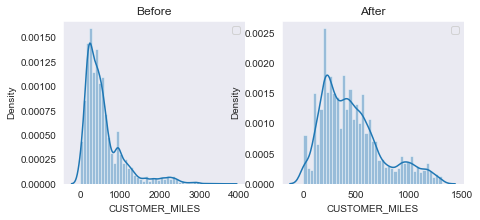

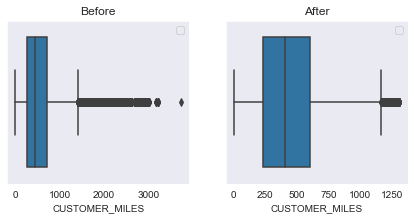

<Figure size 432x288 with 0 Axes>

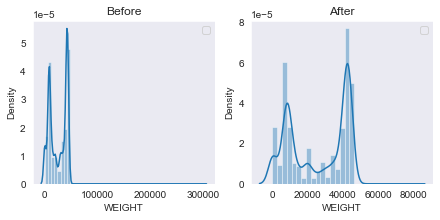

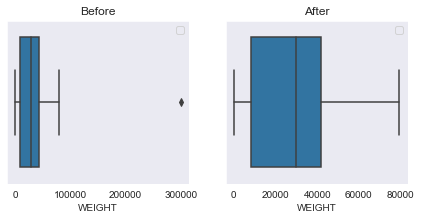

<Figure size 432x288 with 0 Axes>

In [22]:
sns.set_style('dark')
for col in data[num_cols]:
    plt.figure(figsize=(15,3))
    
    plt.subplot(141)
    ax=sns.distplot(data[col])
    plt.title("Before")
    handles, labels = ax.get_legend_handles_labels()
    plt.legend(handles, labels)
    
    plt.subplot(142)
    sns.distplot(train_new[col])
    plt.title("After")
    handles, labels = ax.get_legend_handles_labels()
    plt.legend(handles, labels)
    plt.show()
    
    plt.figure(figsize=(15,3))
    plt.subplot(143)
    sns.boxplot(data[col])
    plt.title("Before")
    handles, labels = ax.get_legend_handles_labels()
    plt.legend(handles, labels)
    
    plt.subplot(144)
    sns.boxplot(train_new[col])
    plt.title("After")
    handles, labels = ax.get_legend_handles_labels()
    plt.legend(handles, labels)
    plt.show()
    plt.tight_layout()
    

In [23]:
data['ORDER_COST'].value_counts()

0.00       3527
600.00     1011
700.00      674
500.00      634
1000.00     595
           ... 
122.32        1
473.87        1
223.81        1
77.48         1
2280.00       1
Name: ORDER_COST, Length: 758, dtype: int64

# Visualization


# **1. shipment cost distribution**



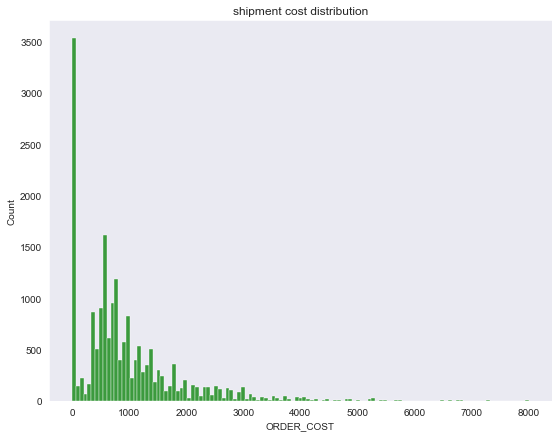

In [24]:
plt.figure(figsize=(9,7))
sns.histplot(data['ORDER_COST'],color='green')
plt.xlabel('ORDER_COST')
plt.ylabel('Count')
plt.title('shipment cost distribution')
plt.show()

#### From the above plot,nearly 3500 shipping orders have no order cost and 1000 orders have minimum value of 600 rupees

# **2.Does the shipment cost depend on the distance?**







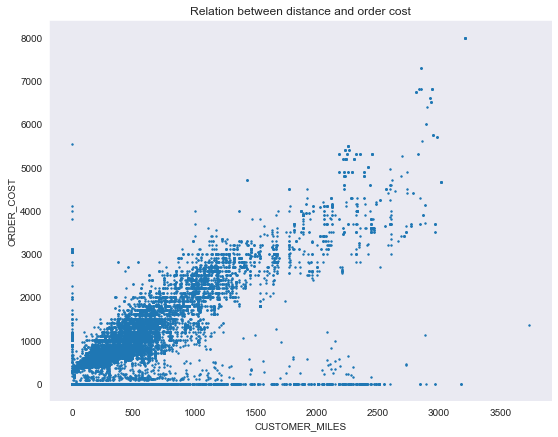

In [25]:
plt.figure(figsize=(9,7))
plt.scatter(data['CUSTOMER_MILES'],data['ORDER_COST'],s=2,)
plt.xlabel('CUSTOMER_MILES')
plt.ylabel('ORDER_COST')
plt.title('Relation between distance and order cost')
plt.show()

#### From the above plot,there is increasing in order_cost as increasing in customer miles.



---

## **3)  Is the weight of the shipment an important predictor to decide the shipment cost?**


---



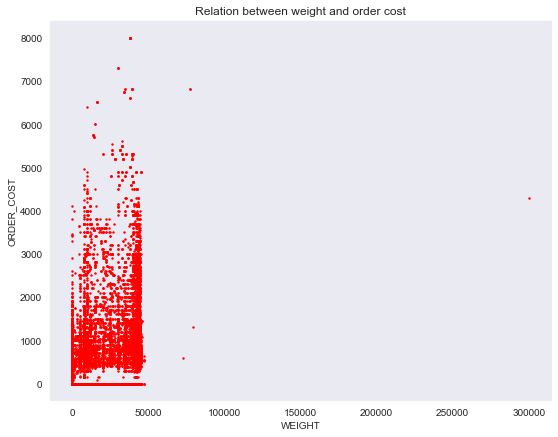

In [26]:
plt.figure(figsize=(9,7))
plt.scatter(data['WEIGHT'],data['ORDER_COST'],s=2,color='red')
plt.xlabel('WEIGHT')
plt.ylabel('ORDER_COST')
plt.title('Relation between weight and order cost')
plt.show()

## i. Hypothesis testing for whether the weight have predictable nature or not

#### Null Hypothesis : The Weight do not having statistically significant predictable nature to predict the shipment cost.




#### Alternative Hypothesis : The weight having significant predictable nature to predict the shipment cost

In [27]:
import scipy.stats as stats

In [28]:
r,p_value =stats.pearsonr(data['WEIGHT'],data['ORDER_COST'])

In [29]:
print("Pearson correlation coefficient: ", r)
print("p-value: ", p_value)

Pearson correlation coefficient:  0.2651718259708916
p-value:  6.111930840435775e-299


#### From the above hypothesis testing,the p-value which is very very less than significance value of 5%.It will conclude that the weight having (correlation of 0.27,less predictable) predictable nature to predict the shippment cost

 

# 4. Is the Shipment cost varying depending on the source and destinations?

In [30]:
ins1=data.groupby(['FIRST_PICK_ZIP','LAST_DELIVERY_ZIP'])['ORDER_COST'].sum().reset_index().sort_values('ORDER_COST',ascending=False,ignore_index=True)
ins1.head(10)

,FIRST_PICK_ZIP,LAST_DELIVERY_ZIP,ORDER_COST
0,93901,60632,179400.0
1,29016,29650,169500.0
2,23185,43229,160938.0
3,14625,43217,154600.0
4,24382,7885,151575.0
5,50010,53094,143950.0
6,24382,21804,129090.0
7,64870,46176,126875.0
8,47960,43607,124200.0
9,24382,18087,119475.0


# 5. Does cost varies depending on the whether the item is hazardous or not ?








#### Null hypothesis (H0): The order cost does not vary depending on whether the item is hazardous or not.



#### Alternative hypothesis (Ha): The cost of the items varies depending on whether the item is hazardous or not.

In [31]:
import pandas as pd
from scipy.stats import ttest_ind

# Assuming you have a dataframe called 'data' with a 'Cost' column and a 'Hazardous' column

# Split the data into two groups based on whether the item is hazardous or not
group1 = data[data['IS_HAZARDOUS'] == 'Y']['ORDER_COST']
group2 = data[data['IS_HAZARDOUS'] == 'N']['ORDER_COST']

# Perform a two-sample t-test
t_statistic, p_value = ttest_ind(group1, group2, equal_var=True)

# Set the significance level
alpha = 0.05

# Print the results
print("Two-Sample T-Test")
print("H0: The cost does not vary depending on whether the item is hazardous or not")
print("HA: The cost varies depending on whether the item is hazardous or not")
print("")

print('Equal Varaince is taken')
print("")


print('significance level is',alpha)
print("")

print("Group 1 (Hazardous):")
print("Mean:", group1.mean())
print("Standard Deviation:", group1.std())
print("")

print("Group 2 (Non-Hazardous):")
print("Mean:", group2.mean())
print("Standard Deviation:", group2.std())
print("")

print("T-Statistic:", t_statistic)
print("P-value:", p_value)

# Compare the p-value with the significance level to make a decision
if p_value < alpha:
    print("Reject H0. The cost varies depending on whether the item is hazardous or not.")
else:
    print("Fail to reject H0. The cost does not vary depending on whether the item is hazardous or not.")


Two-Sample T-Test
H0: The cost does not vary depending on whether the item is hazardous or not
HA: The cost varies depending on whether the item is hazardous or not

Equal Varaince is taken

significance level is 0.05

Group 1 (Hazardous):
Mean: 1049.7767889908257
Standard Deviation: 500.74608330694514

Group 2 (Non-Hazardous):
Mean: 953.105961652714
Standard Deviation: 942.7143694150958

T-Statistic: 1.5115244541866597
P-value: 0.13067175272237003
Fail to reject H0. The cost does not vary depending on whether the item is hazardous or not.


#### The cost does not vary depending on whether the item is hazardous or not

In [32]:
data.dtypes

ORDER_NBR                            int64
EQUIPMENT_TYPE                      object
CUSTOMER_MILES                       int64
WEIGHT                               int64
ORDER_COST                         float64
FIRST_PICK_ZIP                      object
FIRST_PICK_EARLY_APPT       datetime64[ns]
FIRST_PICK_LATE_APPT        datetime64[ns]
LAST_DELIVERY_ZIP                   object
LAST_DELIVERY_EARLY_APPT    datetime64[ns]
LAST_DELIVERY_LATE_APPT     datetime64[ns]
IS_HAZARDOUS                        object
CREATED_DATE                datetime64[ns]
dtype: object

####  Data type conversion

In [33]:
data[['EQUIPMENT_TYPE','FIRST_PICK_ZIP','LAST_DELIVERY_ZIP','IS_HAZARDOUS']]=data[['EQUIPMENT_TYPE','FIRST_PICK_ZIP','LAST_DELIVERY_ZIP','IS_HAZARDOUS']].astype('category')

In [34]:
data.dtypes

ORDER_NBR                            int64
EQUIPMENT_TYPE                    category
CUSTOMER_MILES                       int64
WEIGHT                               int64
ORDER_COST                         float64
FIRST_PICK_ZIP                    category
FIRST_PICK_EARLY_APPT       datetime64[ns]
FIRST_PICK_LATE_APPT        datetime64[ns]
LAST_DELIVERY_ZIP                 category
LAST_DELIVERY_EARLY_APPT    datetime64[ns]
LAST_DELIVERY_LATE_APPT     datetime64[ns]
IS_HAZARDOUS                      category
CREATED_DATE                datetime64[ns]
dtype: object

## which equipment is used to ship more orders?

In [35]:
ins2 = data.groupby(['EQUIPMENT_TYPE'])['ORDER_COST'].sum().reset_index().sort_values('ORDER_COST',ascending=False,ignore_index=True)
ins2.head(8)

,EQUIPMENT_TYPE,ORDER_COST
0,V,9096107.77
1,R,4063199.10
2,VR,3674913.79
3,VZ,228550.00
4,F,69703.00
5,RM,44500.00
6,DROP,22880.00
7,VM,21900.00


In [36]:
#V: Vacuum
# R: Refrigerated
# VR: Virtual Reality
# VZ: Vacuum Zone
# F: Flatbed
# RM: Rail Mounted
# DROP: Drop Deck
# VM: Van/Moving

<AxesSubplot: xlabel='EQUIPMENT_TYPE', ylabel='ORDER_COST'>

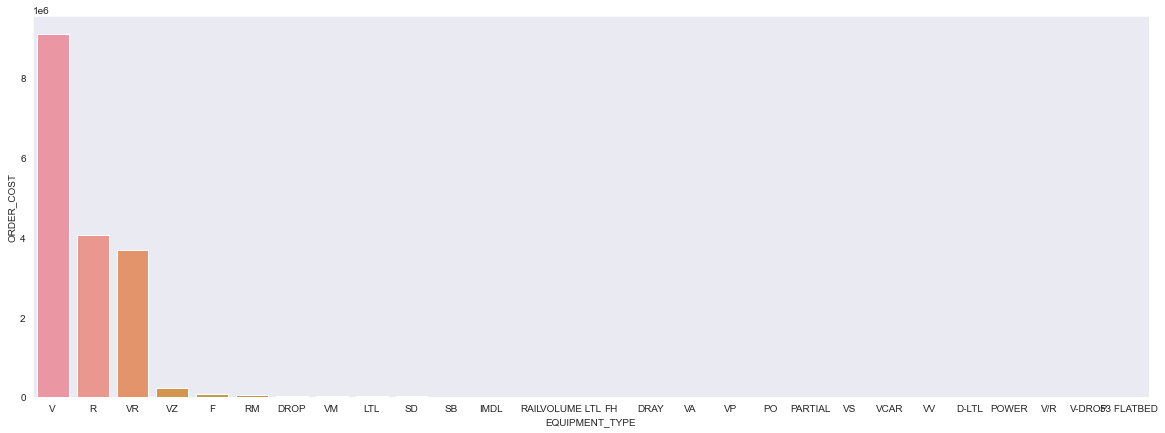

In [37]:
plt.figure(figsize=(20,7))
ins2_sorted = ins2.sort_values('ORDER_COST', ascending=False)

# Plot the barplot with descending order
sns.barplot(data=ins2_sorted, x='EQUIPMENT_TYPE', y='ORDER_COST', order=ins2_sorted['EQUIPMENT_TYPE'])

#### From the above plot,the equipment types V,R and VR are mostly used for orders.

In [38]:
data11=train_new.copy()

In [39]:
data11.shape

(14106, 13)

In [40]:
df=data1.copy()

In [41]:
#dropping unnecessary columns
drop = ['ORDER_NBR','FIRST_PICK_ZIP','LAST_DELIVERY_ZIP']
df.drop(drop,axis=1,inplace=True)

In [42]:
#assigning x and y values for splitting
x=df.drop('ORDER_COST',axis=1)
y=df[['ORDER_COST']]

## Splitting the data

In [43]:
#using train_test_split for splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=123)

### null values checking 

In [44]:
#function for checking null values
def null_values(data):
  print('=======null values========')
  return data.isnull().sum()
null_values(x_train)

=======null values========


EQUIPMENT_TYPE              731
CUSTOMER_MILES                0
WEIGHT                        0
FIRST_PICK_EARLY_APPT        57
FIRST_PICK_LATE_APPT         87
LAST_DELIVERY_EARLY_APPT     86
LAST_DELIVERY_LATE_APPT     116
IS_HAZARDOUS                  0
CREATED_DATE                  0
dtype: int64

In [45]:
null_values(x_test)

=======null values========


EQUIPMENT_TYPE              178
CUSTOMER_MILES                0
WEIGHT                        0
FIRST_PICK_EARLY_APPT        11
FIRST_PICK_LATE_APPT         22
LAST_DELIVERY_EARLY_APPT     15
LAST_DELIVERY_LATE_APPT      27
IS_HAZARDOUS                  0
CREATED_DATE                  0
dtype: int64

In [46]:
x_train.describe()

,CUSTOMER_MILES,WEIGHT
count,12164.000000,12164.000000
mean,567.172394,26231.300312
std,493.806351,16565.043052
min,0.000000,0.000000
25%,246.000000,8000.000000
50%,429.000000,30000.000000
75%,671.000000,42000.000000
max,3733.000000,300000.000000


In [47]:
#separating the features according to the datatypes
num_cols = ['CUSTOMER_MILES','WEIGHT']
cat_cols = ['EQUIPMENT_TYPE','IS_HAZARDOUS']
date_cols = ['FIRST_PICK_EARLY_APPT','FIRST_PICK_LATE_APPT','LAST_DELIVERY_EARLY_APPT','LAST_DELIVERY_LATE_APPT','CREATED_DATE']
target = ['ORDER_COST']
to_drop = ['ORDER_NBR','FIRST_PICK_ZIP','LAST_DELIVERY_ZIP']

# Feature Engineering

### Imputation the categorical columns with mode and numerical columns with median

In [48]:
#imputing for categorical columns
from sklearn.impute import SimpleImputer
cat_impute  =SimpleImputer(strategy='most_frequent')
x_train[cat_cols]=cat_impute.fit_transform(x_train[cat_cols])
x_test[cat_cols]=cat_impute.transform(x_test[cat_cols])

In [49]:
#imputing for numerical columns
num_impute = SimpleImputer(strategy='median')
x_train[num_cols]=num_impute.fit_transform(x_train[num_cols])
x_test[num_cols]=num_impute.transform(x_test[num_cols])

In [50]:
null_values(x_train)

=======null values========


EQUIPMENT_TYPE                0
CUSTOMER_MILES                0
WEIGHT                        0
FIRST_PICK_EARLY_APPT        57
FIRST_PICK_LATE_APPT         87
LAST_DELIVERY_EARLY_APPT     86
LAST_DELIVERY_LATE_APPT     116
IS_HAZARDOUS                  0
CREATED_DATE                  0
dtype: int64

In [51]:
null_values(x_test)

=======null values========


EQUIPMENT_TYPE               0
CUSTOMER_MILES               0
WEIGHT                       0
FIRST_PICK_EARLY_APPT       11
FIRST_PICK_LATE_APPT        22
LAST_DELIVERY_EARLY_APPT    15
LAST_DELIVERY_LATE_APPT     27
IS_HAZARDOUS                 0
CREATED_DATE                 0
dtype: int64

In [52]:
data['MAX_TIME_TO_SERVICE'] = (data['LAST_DELIVERY_LATE_APPT']-data['CREATED_DATE']).dt.days

#getting new feature from delivery times
x_train['MAX_TIME_TO_SERVICE'] = (x_train['LAST_DELIVERY_LATE_APPT']-x_train['CREATED_DATE']).dt.total_seconds()/3600
x_test['MAX_TIME_TO_SERVICE'] = (x_test['LAST_DELIVERY_LATE_APPT']-x_test['CREATED_DATE']).dt.total_seconds()/3600
# getting new feature from pick up times
#getting new feature from delivery times

# Feature Extraction

In [53]:

x_train['TIME_ALLOWANCE_TO_COLLECT'] = (x_train['FIRST_PICK_LATE_APPT']-x_train['FIRST_PICK_EARLY_APPT']).dt.total_seconds()/3600
x_test['TIME_ALLOWANCE_TO_COLLECT'] = (x_test['FIRST_PICK_LATE_APPT']-x_test['FIRST_PICK_EARLY_APPT']).dt.total_seconds()/3600

In [54]:

x_train['TIME_ALLOWANCE_TO_DELIVERY'] = (x_train['LAST_DELIVERY_LATE_APPT']-x_train['LAST_DELIVERY_EARLY_APPT']).dt.total_seconds()/3600
x_test['TIME_ALLOWANCE_TO_DELIVERY'] = (x_test['LAST_DELIVERY_LATE_APPT']-x_test['LAST_DELIVERY_EARLY_APPT']).dt.total_seconds()/3600

In [55]:
date_cols

['FIRST_PICK_EARLY_APPT',
 'FIRST_PICK_LATE_APPT',
 'LAST_DELIVERY_EARLY_APPT',
 'LAST_DELIVERY_LATE_APPT',
 'CREATED_DATE']

In [56]:
#function for dropping date columns
def drop_dates(data):
  data.drop(date_cols,axis=1,inplace=True)
drop_dates(x_train)
drop_dates(x_test)

In [57]:
x_train.head()

,EQUIPMENT_TYPE,CUSTOMER_MILES,WEIGHT,IS_HAZARDOUS,MAX_TIME_TO_SERVICE,TIME_ALLOWANCE_TO_COLLECT,TIME_ALLOWANCE_TO_DELIVERY
6248,V,758.0,30000.0,N,262.166667,7.0,7.0
702,VR,669.0,43902.0,N,109.000000,0.0,0.0
5367,V,195.0,8000.0,N,128.416667,0.0,0.0
17,V,928.0,0.0,N,145.750000,105.0,9.0
242,R,496.0,39920.0,N,119.650000,8.0,0.0


In [58]:
x_test.head()

,EQUIPMENT_TYPE,CUSTOMER_MILES,WEIGHT,IS_HAZARDOUS,MAX_TIME_TO_SERVICE,TIME_ALLOWANCE_TO_COLLECT,TIME_ALLOWANCE_TO_DELIVERY
9602,V,388.0,42000.0,N,91.216667,71.966667,0.0
14826,V,303.0,984.0,N,39.950000,8.000000,0.0
3904,VR,420.0,10000.0,N,51.033333,12.000000,8.0
11573,V,388.0,34214.0,N,158.916667,18.983333,0.0
9415,V,504.0,43000.0,N,144.966667,7.500000,0.0


In [59]:
x_train.isnull().sum()

EQUIPMENT_TYPE                  0
CUSTOMER_MILES                  0
WEIGHT                          0
IS_HAZARDOUS                    0
MAX_TIME_TO_SERVICE           116
TIME_ALLOWANCE_TO_COLLECT      87
TIME_ALLOWANCE_TO_DELIVERY    116
dtype: int64

In [60]:
x_train[['TIME_ALLOWANCE_TO_COLLECT','TIME_ALLOWANCE_TO_DELIVERY','MAX_TIME_TO_SERVICE']] = x_train[['TIME_ALLOWANCE_TO_COLLECT','TIME_ALLOWANCE_TO_DELIVERY','MAX_TIME_TO_SERVICE']].mask(x_train[['TIME_ALLOWANCE_TO_COLLECT','TIME_ALLOWANCE_TO_DELIVERY','MAX_TIME_TO_SERVICE']]<0,np.nan)


In [61]:
x_train.isnull().sum()

EQUIPMENT_TYPE                  0
CUSTOMER_MILES                  0
WEIGHT                          0
IS_HAZARDOUS                    0
MAX_TIME_TO_SERVICE           161
TIME_ALLOWANCE_TO_COLLECT      87
TIME_ALLOWANCE_TO_DELIVERY    116
dtype: int64

In [62]:
cols_knn = ['TIME_ALLOWANCE_TO_COLLECT','TIME_ALLOWANCE_TO_DELIVERY','MAX_TIME_TO_SERVICE']

In [63]:
from sklearn.impute import KNNImputer

In [64]:
knn_impute = KNNImputer(n_neighbors=10)
x_train_knn=pd.DataFrame(knn_impute.fit_transform(x_train[cols_knn]),columns=cols_knn)
x_test_knn=pd.DataFrame(knn_impute.transform(x_test[cols_knn]),columns=cols_knn)

In [65]:
x_train_knn.isnull().sum()


TIME_ALLOWANCE_TO_COLLECT     0
TIME_ALLOWANCE_TO_DELIVERY    0
MAX_TIME_TO_SERVICE           0
dtype: int64

In [66]:
x_test_knn.isnull().sum()

TIME_ALLOWANCE_TO_COLLECT     0
TIME_ALLOWANCE_TO_DELIVERY    0
MAX_TIME_TO_SERVICE           0
dtype: int64

## Feature Scaling

In [67]:
#standardization applied on the numerical columns
from sklearn.preprocessing import StandardScaler,OneHotEncoder
scale=StandardScaler()
x_train_num=pd.DataFrame(scale.fit_transform(x_train[num_cols]),columns=num_cols)
x_test_num=pd.DataFrame(scale.transform(x_test[num_cols]),columns=num_cols)

## OneHotEncoding on categorical columns

In [68]:
cat_col=['EQUIPMENT_TYPE','IS_HAZARDOUS']

In [69]:
#onehotencoding on categorical features
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(x_train[cat_col])

OneHotEncoder(handle_unknown='ignore')

In [70]:
#list out the columns names
cols=list(ohe.get_feature_names_out(x_train[cat_col].columns))

In [71]:
x_train_cat=pd.DataFrame(ohe.transform(x_train[cat_col]).todense(),columns=cols)
x_test_cat=pd.DataFrame(ohe.transform(x_test[cat_col]).todense(),columns=cols)

In [72]:
train_final = pd.concat([x_train_num,x_train_cat,x_train_knn],axis=1)
test_final = pd.concat([x_test_num,x_test_cat,x_test_knn],axis=1)

## Preprocessed Data

In [73]:
#preprocessed data
train_final

,CUSTOMER_MILES,WEIGHT,EQUIPMENT_TYPE_D-LTL,EQUIPMENT_TYPE_DRAY,EQUIPMENT_TYPE_DROP,EQUIPMENT_TYPE_F,EQUIPMENT_TYPE_IMDL,EQUIPMENT_TYPE_LTL,EQUIPMENT_TYPE_PARTIAL,EQUIPMENT_TYPE_PO,...,EQUIPMENT_TYPE_VP,EQUIPMENT_TYPE_VR,EQUIPMENT_TYPE_VS,EQUIPMENT_TYPE_VV,EQUIPMENT_TYPE_VZ,IS_HAZARDOUS_N,IS_HAZARDOUS_Y,TIME_ALLOWANCE_TO_COLLECT,TIME_ALLOWANCE_TO_DELIVERY,MAX_TIME_TO_SERVICE
0,0.386458,0.227519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7.000000,7.0,262.166667
1,0.206218,1.066790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,109.000000
2,-0.753712,-1.100634,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,128.416667
3,0.730737,-1.583599,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,105.000000,9.0,145.750000
4,-0.144136,0.826395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.000000,0.0,119.650000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12159,1.960014,1.068420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,8.000000,8.0,55.850000
12160,1.565106,1.037450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,183.250000
12161,0.143438,1.066669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,301.533333
12162,-0.158312,-1.100634,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,23.966667,0.0,184.533333


In [74]:
train_final.shape

(12164, 30)

In [75]:
test_final.shape

(3042, 30)

In [76]:
train_final.columns

Index(['CUSTOMER_MILES', 'WEIGHT', 'EQUIPMENT_TYPE_D-LTL',
       'EQUIPMENT_TYPE_DRAY', 'EQUIPMENT_TYPE_DROP', 'EQUIPMENT_TYPE_F',
       'EQUIPMENT_TYPE_IMDL', 'EQUIPMENT_TYPE_LTL', 'EQUIPMENT_TYPE_PARTIAL',
       'EQUIPMENT_TYPE_PO', 'EQUIPMENT_TYPE_R', 'EQUIPMENT_TYPE_RAIL',
       'EQUIPMENT_TYPE_RM', 'EQUIPMENT_TYPE_SB', 'EQUIPMENT_TYPE_SD',
       'EQUIPMENT_TYPE_V', 'EQUIPMENT_TYPE_VA', 'EQUIPMENT_TYPE_VCAR',
       'EQUIPMENT_TYPE_VM', 'EQUIPMENT_TYPE_VOLUME LTL', 'EQUIPMENT_TYPE_VP',
       'EQUIPMENT_TYPE_VR', 'EQUIPMENT_TYPE_VS', 'EQUIPMENT_TYPE_VV',
       'EQUIPMENT_TYPE_VZ', 'IS_HAZARDOUS_N', 'IS_HAZARDOUS_Y',
       'TIME_ALLOWANCE_TO_COLLECT', 'TIME_ALLOWANCE_TO_DELIVERY',
       'MAX_TIME_TO_SERVICE'],
      dtype='object')

# Models

## Linear Regression

In [77]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_final,y_train)
train_preds_lr = lr.predict(train_final)
test_preds_lr = lr.predict(test_final)

#### I preferred rmse as metric for this problem because it squares the error,which results in large errors being highlighted than the smaller ones.


In [78]:
print(lr.intercept_,lr.score(train_final,y_train))

[767.8705118] 0.7942612116571045


In [79]:
lr.coef_

array([[ 7.70955321e+02,  1.01111483e+02, -1.56240933e+03,
         1.23228724e+02,  2.65696485e+01,  4.08626368e+02,
        -5.76692341e+02, -3.91569261e+02,  1.35709477e+02,
         7.66270933e+02,  4.30077271e+02, -9.48311550e+02,
         4.82291886e+02,  3.09009652e+02,  6.67544657e+02,
         1.92721327e+02,  5.82208870e+02,  7.22496032e+01,
         6.23819541e+02, -3.48877083e+02, -1.97980045e+03,
         1.78084796e+02,  1.81486162e+02, -2.82004074e+01,
         6.55961504e+02,  1.88381193e+02, -1.88381193e+02,
        -1.30447849e-02, -1.59659091e-05,  8.21896143e-04]])

In [80]:
y_train.reset_index(drop=True,inplace=True)

## Ridge Regression 

In [81]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1)
ridge_model.fit(train_final,y_train)
train_preds_ridge = ridge_model.predict(train_final)
test_preds_ridge = ridge_model.predict(test_final)

### Get Regression Model Summary from Statsmodels package

### Ordinary Least Square Regression (OLS)

In [82]:
import statsmodels.api as sm
model = sm.OLS(y_train,train_final).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             ORDER_COST   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     1673.
Date:                Fri, 19 May 2023   Prob (F-statistic):               0.00
Time:                        06:35:58   Log-Likelihood:                -90628.
No. Observations:               12164   AIC:                         1.813e+05
Df Residuals:                   12135   BIC:                         1.815e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
CUSTOMER_MILES      

# KNN Regressor

In [83]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)

In [84]:
knn.fit(train_final,y_train)

KNeighborsRegressor()

In [85]:
train_preds_knn = knn.predict(train_final)

In [86]:
test_preds_knn = knn.predict(test_final)

## Decision Tree Regressor

In [87]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=5, random_state=42)

# Train model on training set
dtr.fit(train_final, y_train)

# Make predictions on test set
train_preds_dtr = dtr.predict(train_final)

test_preds_dtr = dtr.predict(test_final)

## GridSearchCV on Decision Tree

In [88]:
parameters ={'max_depth':[10,20],
            'min_samples_split':[2,3,4,5],'criterion': ['mse','mae']}

In [89]:
dt = DecisionTreeRegressor()

In [90]:
grid_search_DT = GridSearchCV(dt,param_grid = parameters,cv=5,n_jobs=-1)

In [91]:
grid_search_DT.fit(train_final,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [10, 20],
                         'min_samples_split': [2, 3, 4, 5]})

In [92]:
grid_search_DT.best_params_  

{'criterion': 'mse', 'max_depth': 20, 'min_samples_split': 5}

In [93]:
grid_search_DT.best_score_

0.9017364873776742

# DecisionTreeRegressor using parameters from GridSearchCV

In [94]:
from sklearn.tree import DecisionTreeRegressor
dtr_gscv = DecisionTreeRegressor(max_depth=20,criterion='mse',min_samples_split=5)

# Train model on training set
dtr_gscv.fit(train_final, y_train)

# Make predictions on test set
train_preds_dtr_gscv = dtr_gscv.predict(train_final)

test_preds_dtr_gscv = dtr_gscv.predict(test_final)

# RandomForestRegressor

In [95]:
from sklearn.ensemble import RandomForestRegressor

In [96]:
rfr = RandomForestRegressor()
rfr.fit(train_final,y_train)
train_preds_rfr = rfr.predict(train_final)
test_preds_rfr = rfr.predict(test_final)

# Stacking

In [97]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
# Define the base regressors
base_regressors = [
    ('linear', LinearRegression()),
    ('random_forest', RandomForestRegressor(random_state=42)),
    ('gradient_boosting', GradientBoostingRegressor(random_state=42))
]

# Define the meta-regressor
meta_regressor = LinearRegression()

# Create the stacking regressor
stacking_regressor = StackingRegressor(estimators=base_regressors, final_estimator=meta_regressor)

# Train the stacking regressor
stacking_regressor.fit(train_final, y_train)

# Make predictions on the train set
train_preds_stack = stacking_regressor.predict(train_final)

# Make predictions on the test set
test_preds_stack = stacking_regressor.predict(test_final)

### Error Metrics for different models

In [98]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [99]:
def metrics(y_actual, y_pred, model_name):

    metrics = {}
    
    # Mean Absolute Error (MAE)
    MAE = mean_absolute_error(y_actual, y_pred)
    metrics['MAE'] = MAE
    
    # Mean Squared Error (MSE)
    MSE = mean_squared_error(y_actual, y_pred)
    metrics['MSE'] = MSE
    
    # Root Mean Squared Error (RMSE)
    RMSE = mean_squared_error(y_actual, y_pred, squared=False)
    metrics['RMSE'] = RMSE
    
    # R-squared (R²)
    R2 = r2_score(y_actual, y_pred)
    metrics['R-squared'] = R2
    
    #creating a dataframe of different metrics from different models
    df = pd.DataFrame(metrics, index=[model_name])
    
    return df


### Metrics function for different models on train data

In [100]:
model_metrics = []  # List to store the metrics for each model

# Calculate metrics for Linear Regression
metrics_model1 = metrics(y_train,train_preds_lr, "Linear Regression")
model_metrics.append(metrics_model1)

# Calculate metrics for Ridge Regression
metrics_model11 = metrics(y_train,train_preds_ridge, "Ridge Regression")
model_metrics.append(metrics_model11)

# Calculate metrics for DecisionTree 
metrics_model2 = metrics(y_train,train_preds_dtr, "DecisionTree")
model_metrics.append(metrics_model2)

# Calculate metrics for DecisionTree with gridsearchcv
metrics_model3 = metrics(y_train,train_preds_dtr_gscv, "DecisionTree_GSCV")
model_metrics.append(metrics_model3)

# Calculate metrics for RandomForestRegressor
metrics_model4 = metrics(y_train,train_preds_rfr, "RandomForestRegressor")
model_metrics.append(metrics_model4)

# Calculate metrics for Stacking
metrics_model5 = metrics(y_train,train_preds_stack, "stacking")
model_metrics.append(metrics_model5)

# Concatenate the DataFrames
train_all_metrics = pd.concat(model_metrics)


### Metrics function for different models on test data

In [101]:
model_metrics = []  # List to store the metrics for each model

# Calculate metrics for Linear Regression
metrics_model1 = metrics(y_test,test_preds_lr, "Linear Regression")
model_metrics.append(metrics_model1)

# Calculate metrics for Ridge Regression
metrics_model11 = metrics(y_test,test_preds_ridge, "Ridge Regression")
model_metrics.append(metrics_model11)

# Calculate metrics for KNN
metrics_model2 = metrics(y_test,test_preds_knn, "KNN")
model_metrics.append(metrics_model2)


# Calculate metrics for DecisionTree 
metrics_model3 = metrics(y_test,test_preds_dtr, "DecisionTree")
model_metrics.append(metrics_model3)

# Calculate metrics for DecisionTree with gridsearchcv
metrics_model4 = metrics(y_test,test_preds_dtr_gscv, "DecisionTree_GSCV")
model_metrics.append(metrics_model4)

# Calculate metrics for RandomForestRegressor
metrics_model5 = metrics(y_test,test_preds_rfr, "RandomForestRegressor")
model_metrics.append(metrics_model5)

# Calculate metrics for Stacking
metrics_model6 = metrics(y_test,test_preds_stack, "stacking")
model_metrics.append(metrics_model6)

# Concatenate the DataFrames
test_all_metrics = pd.concat(model_metrics)

In [102]:
train_all_metrics

,MAE,MSE,RMSE,R-squared
Linear Regression,265.927349,173355.995100,416.360415,0.794261
Ridge Regression,266.264184,173557.142481,416.601899,0.794022
DecisionTree,218.250167,104857.653468,323.817315,0.875555
DecisionTree_GSCV,41.715866,8104.453214,90.024737,0.990382
RandomForestRegressor,41.935583,6529.755228,80.806901,0.992250
stacking,46.561981,7382.543432,85.921729,0.991238


In [103]:
test_all_metrics

,MAE,MSE,RMSE,R-squared
Linear Regression,258.948076,154791.505979,393.435517,0.795506
Ridge Regression,259.061199,154751.571183,393.384762,0.795559
KNN,351.223234,279281.831806,528.471221,0.631043
DecisionTree,223.370780,104633.734377,323.471381,0.861769
DecisionTree_GSCV,126.827523,65462.952416,255.857289,0.913517
RandomForestRegressor,105.155007,34480.844028,185.690183,0.954448
stacking,107.182468,34401.811936,185.477254,0.954552
